In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib as mp
%matplotlib inline

Будем изучать зависимость двух параметров: соотношения полов в популяции и счастье покемона.

In [2]:
pokemon = pd.read_csv('pokemon.csv',usecols=['gender_rate', 'base_happiness'])

In [3]:
pokemon.head()

,gender_rate,base_happiness
0,1,70
1,1,70
2,1,70
3,1,70
4,1,70


In [4]:
pokemon.gender_rate.unique()

array([ 1,  4,  8,  0,  6,  2, -1], dtype=int64)

Возможных значений параметра 'gender_rate' 7, они означают какую часть популяции конкретного покемона занимают женщины.
Мне это деление кажется слишком строгим, поэтому немного изменим группировку покемонов по полам: с преобладанием мужчин, преобладанием женщин, с одинаковым количеством тех и других, и бесполых покемонов.

In [5]:
def regroup_genders(r):
    if ((r['gender_rate'] > -1) and (r['gender_rate'] < 4)):
        return('Mostly male')
    elif r['gender_rate'] == 4:
        return('Half')
    elif r['gender_rate'] > 4:
        return('Mostly female')
    else:
        return('Nongendered')

In [6]:
pokemon = pokemon.assign(gender=pokemon.apply(regroup_genders, axis=1))

Графики количества видов покемонов и их счастья в зависимости от пола.

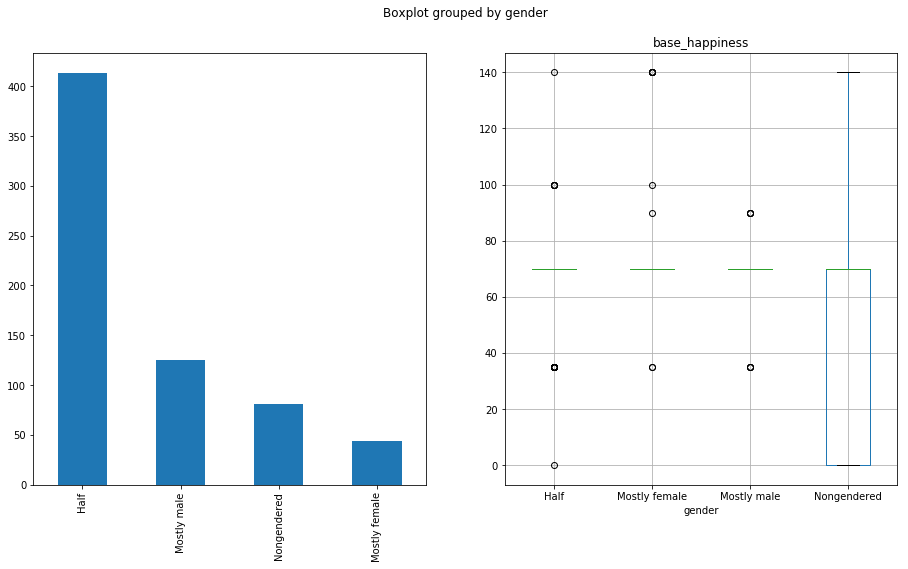

In [7]:
mp.rcParams['figure.figsize'] = (15,8)
fig, axs = mp.pyplot.subplots(1,2)
pokemon['gender'].value_counts().plot.bar(ax=axs[0])
pokemon.boxplot(column='base_happiness', by='gender', ax=axs[1])

In [8]:
pokemon.groupby('gender').mean()['base_happiness']

gender
Half             66.634383
Mostly female    79.090909
Mostly male      69.520000
Nongendered      50.493827
Name: base_happiness, dtype: float64

Как можно заметить, средний уровень счастья в женских обществах покемонов значительно выше, чем во всех остальных. 
Проверим гипотезу, что виды покемонов с преобладанием женщин более счастливы с помощью теста Краскела.

In [9]:
females = pokemon.loc[pokemon['gender'] == 'Mostly female']['base_happiness']
males = pokemon.loc[pokemon['gender'] != 'Mostly female']['base_happiness']
stats.kruskal(males, females)

KruskalResult(statistic=13.817575544546145, pvalue=0.000201443003571663)

Так как p-value < 0.05, то можно заключить, что связь между полом и счастьем действительно присутствует и женщины-покемоны ведут более счастливую жизнь.